# بسم الله الرحمن الرحيم
# The Import Statements

In [69]:
from collections import Counter
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
%matplotlib inline

# loading the dataset

In [70]:
digits = load_digits()

# Explorting the dataset

In [71]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [72]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [73]:
digits.target[0]

0

# The number of classes in the dataset

In [74]:
classes = np.unique(digits.target)
print("classes:", classes)
print("number of classes:", len(classes))

classes: [0 1 2 3 4 5 6 7 8 9]
number of classes: 10


## for the sake of simplicity the targets will be at the last index of the rows

In [75]:
digits_and_targets = np.insert(digits.data, 64, values=digits.target, axis=1)

## splitting the data to a training set and a test set

In [76]:
training, test = train_test_split(digits_and_targets, test_size=.20, random_state=1)

# How the data is modelled.
### The last digit in the Numpy Array is the label of the image  

In [77]:
for i in range(3):
    print("digit: ", training[i][-1], "\n", training[i], "\n")

digit:  4.0 
 [ 0.  0.  0.  2. 15.  8.  0.  0.  0.  0.  1. 15. 13.  3.  0.  0.  0.  0.
  9. 13.  1.  0.  0.  0.  0.  1. 15.  6.  0.  5. 11.  0.  0.  7. 14.  0.
  1. 15.  8.  0.  0.  8. 15.  9. 15. 16.  3.  0.  0.  1. 11. 16. 16. 10.
  0.  0.  0.  0.  0.  2. 15.  5.  0.  0.  4.] 

digit:  9.0 
 [ 0.  0.  0.  7. 16. 16. 11.  0.  0.  0.  6. 16. 16. 16. 16.  0.  0.  0.
 11. 16. 16. 16.  9.  0.  0.  0.  2.  9. 11. 14. 10.  0.  0.  0.  0.  0.
  0. 10.  6.  0.  0.  0.  0.  0.  4. 11.  1.  0.  0.  0.  0.  2. 14.  2.
  0.  0.  0.  0.  0. 11.  3.  0.  0.  0.  9.] 

digit:  6.0 
 [ 0.  0.  0.  6. 11.  0.  0.  0.  0.  0.  0. 15. 10.  0.  0.  0.  0.  0.
  7. 15.  2.  0.  0.  0.  0.  0. 16.  6.  0.  0.  0.  0.  0.  3. 16.  7.
  5.  5.  0.  0.  0.  2. 16. 13.  9. 13. 11.  0.  0.  0.  8. 13.  7.  5.
 15.  3.  0.  0.  0.  5. 11. 13. 12.  2.  6.] 



## A few images from the dataset

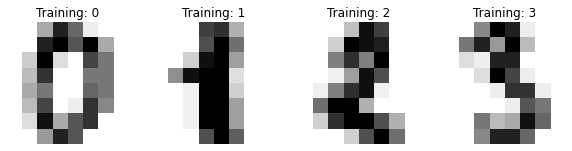

In [78]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# The class for modelling a node in a decision tree

In [79]:
class Node:
    def __init__(self):
        self.left = None
        self.right = None
        # when this node is a leaf this field will hold the decision of its tree
        self.class_decision = None
        self.features_subset = None

# How the decision tree is grown

In [80]:
# for deciding whether there's still entropy in the data
def should_split(data):
    return len(np.unique(data[:,-1])) > 1

# extract the class from the data row
def extract_class(data_and_targets):
    return data_and_targets[:1,-1][0]

# growing a tree from a sample
def grow_tree(data_and_targets, node=Node(), feature_index=0, max_features=32, features_indices=None):
    if features_indices is None:
        np.random.seed(3)
        node.features_subset = np.random.randint(0, 64, (max_features,))
        features_indices = node.features_subset

    if feature_index == len(features_indices) - 1 or not should_split(data_and_targets):
        node.class_decision = extract_class(data_and_targets)

    elif should_split(data_and_targets):
        left_slice = data_and_targets[data_and_targets[:,features_indices[feature_index]]<8]
        right_slice = data_and_targets[data_and_targets[:,features_indices[feature_index]]>=8]

        feature_index+=1

        if len(left_slice):
            node.left = Node()
            grow_tree(left_slice, node.left, feature_index, features_indices=features_indices)

        if len(right_slice):
            node.right = Node()
            grow_tree(right_slice, node.right, feature_index, features_indices=features_indices)

    return node

# Planting the trees of the forest 🙂


In [81]:

def create_the_forest(trees_number, sample_size):
    the_forest = []

    for _ in range(trees_number):
        random_indices = np.random.choice(training.shape[0], size=sample_size, replace=False)
        new_tree = grow_tree(training[random_indices])
        the_forest.append(new_tree)

    return the_forest

## A sample with 10 trees, and in this case all the images are used for growing the trees


In [82]:
forest_with_extra_large_samples = create_the_forest(trees_number=10, sample_size=training.shape[0])

# How the testing of the accuracy of the trained model is done

In [83]:
def predict_class(tree_root_node: Node, data, index=0, features_indices=None):
    if features_indices is None:
        features_indices = tree_root_node.features_subset

    if index == len(features_indices) - 1:
        return tree_root_node.class_decision

    if data[features_indices[index]] < 8:
        if tree_root_node.left is not None:
            return predict_class(tree_root_node.left, data, index+1, features_indices)
    elif tree_root_node.right is not None:
            return predict_class(tree_root_node.right, data, index+1, features_indices)

    return tree_root_node.class_decision

def get_votes(forest, image):
    votes = []

    for tree in forest:
        votes.append(predict_class(tree, image))

    return votes

def predict_number(forest, image):
    votes = get_votes(forest, image)

    try:
        values, counts = np.unique(votes, return_counts=True)
        return values[np.argmax(counts)]
    except Exception as e:
        return None

In [84]:
def calc_accuracy_of_forest(forest):
    count = 0

    for image in test:
        if predict_number(forest, image) == image[-1]:
            count += 1

    accuracy = count / test.shape[0]

    print("the accuracy of the predictions is:", accuracy)
    return accuracy

# The accuracy of the model

In [85]:
accuracy = calc_accuracy_of_forest(forest_with_extra_large_samples)

the accuracy of the predictions is: 0.7583333333333333


# The problem with the votes!

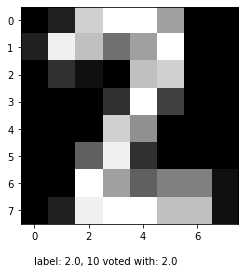

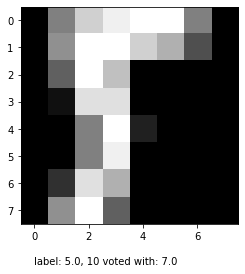

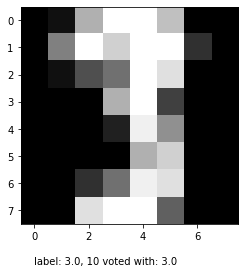

In [86]:
for test_index in np.random.randint(0, 100, (3,)):
    plt.gray()
    plt.imshow(test[test_index][:64].reshape(8, 8))

    label = "label: " + str(test[test_index][-1]) + ", "

    the_votes = get_votes(forest_with_extra_large_samples, test[test_index])

    if the_votes[0] is not None:
        values, counts = np.unique(the_votes, return_counts=True)
        for i in range(len(values)):
            label += str(counts[i]) + " voted with: " + str(values[i])
    else:
        label += str(len(the_votes)) + " voted with: " + str(Counter(the_votes))

    plt.text(0, 9, label)

    plt.show()
